<a href="https://colab.research.google.com/github/Shivani11032006/Assignment/blob/main/day20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  481 non-null    object 
 2   Product_Price     485 non-null    float64
 3   Customer_Age      490 non-null    float64
 4   Rating            480 non-null    float64
 5   Review_Text       484 non-null    object 
 6   Order_Date        495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB

Summary Statistics:
         Order_ID  Product_Price  Customer_Age      Rating
count  505.000000     485.000000    490.000000  480.000000
mean   249.899010    2441.872165     42.144898    3.197917
std    144.769438    1415.869769     14.901086    1.145198
min      1.000000     108.000000     18.000000    1.000000
25%    124.000000    1240.000000     30.000000    2.000000
50%    250.000000    

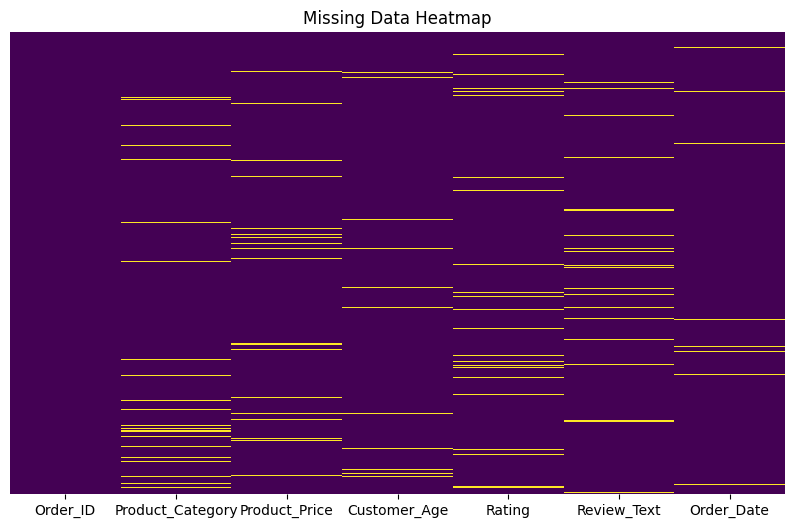


Final Missing Values:
Order_ID             0
Product_Category     0
Product_Price       20
Customer_Age         0
Rating               0
Review_Text          0
Order_Date           0
dtype: int64

Final Duplicates: 0

Data Types:
Order_ID              int64
Product_Category      int64
Product_Price       float64
Customer_Age        float64
Rating              float64
Review_Text           int64
Order_Date            int64
dtype: object

Data Cleaning Completed. Cleaned dataset saved.


<ipython-input-5-3ae662c37992>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)
<ipython-input-5-3ae662c37992>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
df = pd.read_csv("/content/Day 20_E-Commerce_Data.csv")  # Replace with actual file path

# Initial Exploratory Data Analysis
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isna().sum())

# Compute percentage of missing values
missing_percentage = (df.isna().sum() / len(df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# Handling Missing Data
if 'Rating' in df.columns:
    df['Rating'].fillna(df['Rating'].median(), inplace=True)

if 'Customer_Age' in df.columns:
    df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)

if 'Review_Text' in df.columns:
    df['Review_Text'].fillna("No Review", inplace=True)

# Detect and Remove Duplicates
df.drop_duplicates(inplace=True)

# Handle Inconsistent Data
if 'Rating' in df.columns:
    df['Rating'] = df['Rating'].clip(1, 5)  # Standardize Ratings to range 1-5

# Detect and Handle Outliers
for col in ['Product_Price', 'Rating']:
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Standardize and Normalize Data
scaler = MinMaxScaler()
for col in ['Product_Price', 'Customer_Age']:
    if col in df.columns:
        df[[col]] = scaler.fit_transform(df[[col]])

# Convert categorical variables to numerical
encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Data Validation
print("\nFinal Missing Values:")
print(df.isna().sum())
print("\nFinal Duplicates:", df.duplicated().sum())
print("\nData Types:")
print(df.dtypes)

# Save the cleaned dataset
df.to_csv("cleaned_ecommerce_reviews.csv", index=False)

print("\nData Cleaning Completed. Cleaned dataset saved.")
